# 机器学习的过程
## 数据处理
1. 数据收集(数据检索[mysql、hive、hadoop]、数据挖掘()、爬虫)
2. 数据清洗
3. 特征工程
## 机器学习
1. 选择模型(算法)
2. 训练模型(算法)
3. 评估模型(工具、框架、算法知识)
4. 测试模型(AB Test)
## 业务运维
1. 应用模型
2. 维护模型

# 机器学习典型应用
股价预测、推荐引擎、自然语言识别、语音识别、图像识别、人脸识别
# 机器学习的基本问题
- 回归问题
- 分类问题
- 聚类问题
- 降维问题

# 均值移除(标准化)


In [46]:
import sklearn.preprocessing as sp
import numpy as np

In [47]:
raw_samples = np.array([
    [17, 100, 4000.0],
    [20., 80., 5000],
    [23., 75., 5500]
])

## 每一列均值为0 标准差为1
std_samples = sp.scale(raw_samples)
print(std_samples)
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

std_scaler = sp.StandardScaler()
X_std = std_scaler.fit_transform(raw_samples)
print(X_std)

[[-1.22474487  1.38873015 -1.33630621]
 [ 0.         -0.46291005  0.26726124]
 [ 1.22474487 -0.9258201   1.06904497]]
[ 0.00000000e+00 -3.70074342e-17  5.18104078e-16]
[1. 1. 1.]
[[-1.22474487  1.38873015 -1.33630621]
 [ 0.         -0.46291005  0.26726124]
 [ 1.22474487 -0.9258201   1.06904497]]


# 范围缩放


In [ ]:
arr = np.array([17, 20 ,23])
arr_min = (arr - arr.min())
# arr_scale = arr_min / (arr.max() - arr.min())
arr_scale = arr_min / arr_min.max()
print(arr)
print(arr_min)
print(arr_scale)

### 特征缩放范围(0,1)--》可以自由变更
min_max_scaler = sp.MinMaxScaler(feature_range=(0, 1))
### 只能接受二维数组。方法是fit_transform--拟合转化, fit是拟合
print(min_max_scaler.fit_transform(arr.reshape(-1, 1)))

## 线性拟合
A = np.array([
    [17, 1],
    [23, 1]
])
B = np.array([
    [0],
    [1]
])
X = np.linalg.lstsq(A, B)
print(X[0][0], X[0][1])
print(X[0][0]*20 + X[0][1])

def min_max_scaler_func(X):
    X_copy = X.copy()
    for col in X_copy.T:
        col_min = col.min()
        col_max = col.max()
        A = np.array([[col_min, 1], [col_max, 1]])
        B = np.array([[0], [1]])
        x = np.linalg.lstsq(A, B)[0]
        col *= x[0]
        col += x[1]
    return X_copy
# min_max_scaler_func(raw_samples)

print(min_max_scaler.fit_transform(raw_samples))
print(min_max_scaler_func(raw_samples))

线性回归预测公式:

$\hat{y}(w,x) = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

这里 $x_i$ 代表输入向量的第i维，$w_i$ 则是参数的第i维，$\hat{y}$是输出值。

In [ ]:
import sklearn.linear_model as lr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1234)
# X = np.random.randint(1,10, size=(5,2))
X = np.random.randint(1, 10, size=(500, 2))
## y = 2*x_0 + 3*x_1 + 4
y = np.dot(X, np.array([2, 3])) + 4
print('X', X)
print('y', y)
reg = lr.LinearRegression()
reg.fit(X, y)
print('线性模型系数是:', reg.coef_)
print('线性模型偏置是:', reg.intercept_)
pred = reg.predict(np.array([[4, 5]]))
print("线性模型预测值:", pred)
print("线性模型评分值:", reg.score(X, y))

### 从这里可以看出只要给X和预测值Y,就可以进行线性拟合,得到系数,然后就可以预测

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.scatter(X[:,0], X[:,1], y)
axes.set_xlabel(r'$X_0$')
axes.set_ylabel(r'$X_1$')
axes.set_zlabel("y")
plt.show()

X [[4 7]
 [6 5]
 [9 2]
 [8 7]
 [9 1]
 [6 1]
 [7 3]
 [1 6]
 [3 7]
 [4 8]
 [1 1]
 [4 3]
 [4 2]
 [4 2]
 [4 8]
 [2 8]
 [5 1]
 [6 2]
 [6 5]
 [1 9]
 [9 7]
 [9 7]
 [4 2]
 [3 6]
 [3 6]
 [7 8]
 [5 4]
 [6 7]
 [5 7]
 [3 5]
 [3 8]
 [8 8]
 [3 8]
 [5 1]
 [3 2]
 [3 2]
 [6 8]
 [5 8]
 [8 2]
 [5 1]
 [6 5]
 [3 2]
 [4 6]
 [4 1]
 [5 5]
 [1 7]
 [9 5]
 [9 2]
 [9 9]
 [3 1]
 [3 3]
 [4 3]
 [8 5]
 [9 2]
 [3 8]
 [5 4]
 [3 6]
 [6 2]
 [1 9]
 [5 1]
 [1 2]
 [1 4]
 [2 4]
 [8 4]
 [5 5]
 [2 2]
 [7 3]
 [9 8]
 [9 1]
 [9 8]
 [6 7]
 [4 5]
 [8 8]
 [2 8]
 [3 6]
 [3 8]
 [3 7]
 [9 7]
 [2 4]
 [4 5]
 [8 3]
 [9 2]
 [5 4]
 [2 1]
 [8 9]
 [1 4]
 [4 1]
 [6 3]
 [4 2]
 [8 2]
 [5 8]
 [4 9]
 [5 6]
 [4 9]
 [9 9]
 [2 4]
 [7 9]
 [2 6]
 [9 5]
 [2 2]
 [2 3]
 [4 5]
 [3 2]
 [5 1]
 [1 3]
 [2 3]
 [6 9]
 [9 8]
 [6 8]
 [1 1]
 [7 7]
 [2 5]
 [7 8]
 [3 1]
 [8 1]
 [3 9]
 [5 9]
 [4 3]
 [5 8]
 [8 1]
 [2 2]
 [1 1]
 [1 2]
 [2 5]
 [6 3]
 [5 2]
 [1 4]
 [6 3]
 [4 4]
 [6 5]
 [6 5]
 [1 6]
 [7 8]
 [4 2]
 [6 5]
 [6 2]
 [8 7]
 [4 4]
 [1 1]
 [3 4]
 [2 7]
 [2 4]
 [6 

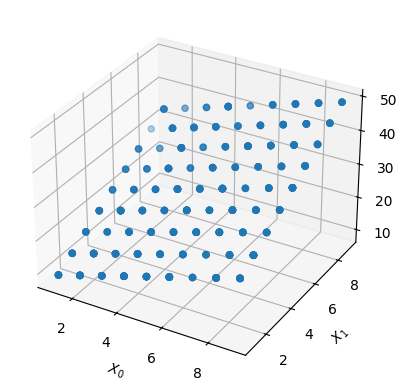

In [82]:
import numpy as np
from IPython.core.pylabtools import figsize
from sklearn import linear_model
import matplotlib.pyplot as plt
model = linear_model.LinearRegression()
## Y = w0 + w1*x1 + w2*x2 + ... + wn*xn
## y = kx + b
X = np.array([
    [0, 0],
    [1, 1],
    [2, 2]
])
Y = np.array([0, 1, 2])
model.fit(X, Y)
## model.intercept_ w0
## model.coef_ (w1, w2, ...)
print(model.coef_, model.intercept_)
# plt.figure()
# plt.scatter(X[:, 0], X[:, 1])
# plt.show()

In [89]:
from sklearn.svm import SVR
np.random.seed(1234)
X = np.random.randint(1, 10, size=(500, 2))
## y = 2*x_0 + 3*x_1 + 4
y = np.dot(X, np.array([2, 3])) + 4
# model = SVR(kernel='linear')
# model = SVR()
# svm包括三个参数:核函数及其系数、惩罚参数
model = SVR(kernel='rbf', gamma=1, C=50, epsilon=0.01)
model.fit(X, y)
# print('svr模型系数是:', model.coef_)
# print('svr模型偏置是:', model.intercept_)
pred = reg.predict(np.array([[4, 5]]))
print("svr模型预测值:", pred)
print("svr模型评分值:", model.score(X, y))

svr模型预测值: [27.]
svr模型评分值: 0.9999988672297145


### 通用模型

- 线性模型	LinearModels	https://scikit-learn.org/stable/modules/linear_model.html
- 神经网络	trtneural_network	https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network
- 支持向量机	SVM	https://scikit-learn.org/stable/modules/svm.html
- 高斯过程	gaussian_process	https://scikit-learn.org/stable/modules/gaussian_process.html
- 决策树	tree	https://scikit-learn.org/stable/modules/tree.html
- 随机森林	ensemble.RandomForestRegressor	https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor


In [94]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
param_grid = {'kernel': ('rbf', 'linear'), 'C': [1, 10]}
svc = svm.SVC()
### n_jobs代表2核并行 -1时代表不限制cpu核数
clf = GridSearchCV(svc, param_grid, n_jobs=2)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('rbf', 'linear')})

In [95]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [96]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [97]:
clf.best_estimator_

SVC(C=1, kernel='linear')

In [100]:
clf.best_estimator_.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 集成学习

1. 采用同一基模型,在样本的不同子集上进行训练,从而得到对应的多个不同具体模型. 这类学习方法的
   代表有:boosting, bagging
2. 采用多种基模型,在同一样本上进行训练,将多个模型组合起来得到具体模型,比如voting、stacking

## 单一模型集成 -- Adaboost为例

In [111]:
## 单一模型集成 -- Adaboost为例

from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(LogisticRegression(), n_estimators=100)
clf.fit(X, y)
clf.predict(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 多模型集成 -- 以voting为例

In [114]:
### 多模型集成 -- 以voting为例
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target
print(X)
clf1 = LogisticRegression(max_iter=500, random_state=1)
clf2 = RandomForestClassifier(random_state=1, n_estimators=50)
clf3 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard'
)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %.2f (+/- %.2f) [%s]" % (scores.mean(), scores.std(), label))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.